# Checkpoint 2

**Due: Friday, 6 November, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
from scipy.sparse import identity

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

In [2]:
from scipy import integrate # a couple of necessary imports
from scipy.linalg import eigh_tridiagonal

# Task 1 (25p)

Find numerically the first 101 lowest eigenvalues (“energies”) of the discrete Hamiltonian matrix, H, for V=0 and x=0,...,L, with L=100, dx=1/8 and with reflecting boundary conditions:

$
\begin{align}
\psi_N \equiv \psi_{N-1},
\end{align}
$

$
\begin{align}
\psi_{-1} \equiv \psi_0,
\end{align}
$

Here the index -1 denotes the element to the left of the element zero, not the element N-1 as in Python. Note that indices $-1, N$ refer to elements of $\psi$ that are outside the matrix H.

Hint: The eigenvalues, $w_n$, should be

$
\large
\begin{align}
w_n = \frac{2\left(1 - \cos (\frac{n \pi}{N}) \right)}{dx^2}
\end{align}
$

for n=0, 1,..., 100. The corresponding (non-normalized) eigenvectors, $v_n$ are

$
\large
\begin{align}
v_n = \cos \left( \frac{n \pi x}{L} \right)
\end{align}
$

for x=0, dx,..., (N-1)dx.

In [3]:
### Values for task 1
L  = 100
dx = 1/8
N  = int(L/dx)
print(f"Matrix size: {N}.")

Matrix size: 800.


In the cell below, compute the 101 lowest eigenvalues given the values of V, L, and dx from above. The function, `task1` should return an array of the eigenvalues.

It may be useful to write a generalized function for creating the Hamiltonian given values of N, dx, and V.

In [4]:
def Hamiltonian(N, dx, V):
    """
    Creates a hamiltonian of dimensions N x N based on dx and the potential
    """
    L = - diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
    L[0,0] = 1
    L[N-1,N-1] = 1
    L = L/dx**2
    return L

def task1():
    hevals, hevecs = eigsh(H, 101, which = 'SM') # finds the 101 smallest eigenvectors and eigenvalues
    return hevals
H = Hamiltonian(N, dx, 0)
task1()
    

array([-2.15386522e-14,  9.86959172e-04,  3.94782147e-03,  8.88254123e-03,
        1.57910423e-02,  2.46732183e-02,  3.55289321e-02,  4.83580163e-02,
        6.31602732e-02,  7.99354744e-02,  9.86833612e-02,  1.19403645e-01,
        1.42096005e-01,  1.66760092e-01,  1.93395526e-01,  2.22001896e-01,
        2.52578761e-01,  2.85125649e-01,  3.19642059e-01,  3.56127457e-01,
        3.94581282e-01,  4.35002941e-01,  4.77391809e-01,  5.21747234e-01,
        5.68068531e-01,  6.16354986e-01,  6.66605854e-01,  7.18820361e-01,
        7.72997702e-01,  8.29137040e-01,  8.87237510e-01,  9.47298216e-01,
        1.00931823e+00,  1.07329660e+00,  1.13923234e+00,  1.20712442e+00,
        1.27697181e+00,  1.34877343e+00,  1.42252816e+00,  1.49823488e+00,
        1.57589240e+00,  1.65549955e+00,  1.73705508e+00,  1.82055775e+00,
        1.90600625e+00,  1.99339928e+00,  2.08273549e+00,  2.17401350e+00,
        2.26723191e+00,  2.36238926e+00,  2.45948411e+00,  2.55851494e+00,
        2.65948024e+00,  

## Testing task 1

The cell below will run your function and compare it with the expected values.

Time to solution: 1.5060064792633057 seconds.


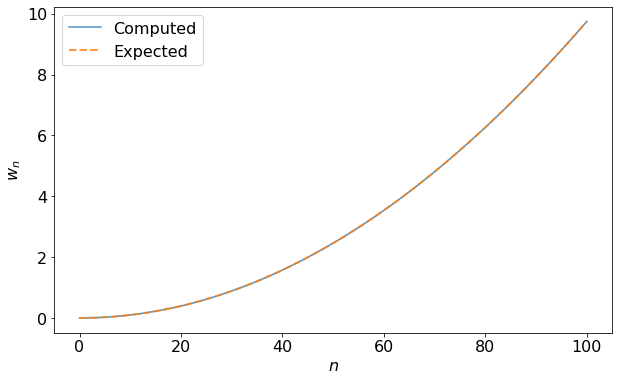

Max difference is 5.422113939488652e-12.


In [5]:
t1 = time.time()
ww = task1()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")

my_n = np.arange(101)
ww_expected = 2 * (1 - np.cos(my_n*np.pi/N)) / dx**2

plt.plot(my_n, ww, label='Computed', alpha=0.8)
plt.plot(my_n, ww_expected, label='Expected', linewidth=2, linestyle='--', alpha=0.8)
plt.xlabel(r'$n$')
plt.ylabel(r'$w_{n}$')
plt.legend()
plt.show()

diff = np.abs(ww - ww_expected) / np.max(np.abs([ww, ww_expected]), axis=0)
print (f"Max difference is {diff[1:].max()}.")
assert (diff[1:] < 1e-6).all()

# Task 2 (5p)

Select dx as a negative power of two ($dx=2^{-n}$ for n>0) such that the 101th eigenvalue differs from the dx$\rightarrow$0 limiting value of

$
\begin{align}
w_{101,exact} = \frac{(100\pi/N)^{2}}{dx^2}
\end{align}
$

by less than 0.1%, i.e., $|w_{101}/w_{101,exact}-1|<0.001$.

Motivation: selecting a sufficiently small dx is required to obtain a good approximation to the original (continuous) equation (1) for subsequent tasks.

In the cell below, compute a value of dx that satisfies the above contraint. The function `task2` should return the value of dx that you have calculated.

In [6]:
def get_w101(N, dx):
    d = 2 * 1/dx**2 * np.ones(N) # create middle diagonal
    d[0], d[-1] = 0.5 * d[0], 0.5*d[-1] # add boundary conditions
    e = -1/dx**2 * np.ones(N-1) # create side diagonals
    w101, _ = eigh_tridiagonal(d, e, select = 'i', select_range = (0, 100)) # solve for first 101 eigs
    return w101[-1] # return 101st eigenvalue


def task2():
    n = 1 # initial conditions
    dx = 2**(-n) # d is always a power of 2
    N = int(L/dx)
    w_exact = ((100 * np.pi / N)**2)/(dx**2) # calculates the exact n
    w_101 = get_w101(N, dx) # calculates the numerical w101
    
    while np.abs(w_101/w_exact - 1) > 0.001: # continue to loop as long as above constraint is not satisfied
        n += 1
        dx = 2**(-n)
        N = int(L/dx)
        w_exact = ((100 * np.pi / N)**2)/(dx**2) # recalculate w_exact and w_101
        w_101 = get_w101(N, dx)
    return dx

print(task2())

0.03125


## Testing task 2

The cell below will run the `task2` function. We will verify that value of dx return satisfies the criterion outlined above.

In [7]:
t1 = time.time()
my_dx = task2()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")


Time to solution: 0.33437156677246094 seconds.


# Task 3 (20p)

Solve equation (1) with the initial condition (2) (the Schroedinger equation and the Gaussian function from the checkpoint's description) for V(x)=0, on a domain x=0...100, for t=0...4 and dx from task 2. Plot $|\psi(x,t)|^2$ and determine its mean given by

$
\large
\begin{align}
<x>\ = \int_{0}^{100} |ψ(x)|^2 x dx.
\end{align}
$

The mean should be equal to 79$\pm$-1.

Hint: use the procedure for creating the Hamiltonian matrix from tasks 1, 2. This will reduce the amount of coding required.

In [8]:
### Constants for task 3 and 4
x0     = 15
v      = 16
sigma2 = 5
tmax   = 4

In [9]:
def psi_0(x):
    """
    Creates a basic wavefunction
    """
    return np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x/2))

def psi_0_abs(x):
    """
    Creates a mean squared wavefunction
    """
    return np.abs(psi_0(x))**2


def create_normalized_wavefunction(x, v):
    """
    Creates a normalized wavefunction
    """
    u = np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x/2)) # normal wavefunction
    c = np.sqrt(integrate.quad(psi_0_abs, 0, L)[0]) # normalization factor
    return u/c
    
def calc_eigens(V, n_eigen):
    d = 2 * 1/dx**2 * np.ones(N) # create middle diagonal
    d[0], d[-1] = 0.5 * d[0], 0.5*d[-1] # add boundary conditions
    d += V # add potential
    e = -1/dx**2 * np.ones(N-1) # create side diagonals
    lam, phi = eigh_tridiagonal(d, e, select = 'i', select_range = (0, n_eigen)) # calculate eigens
    return lam, phi # return eigens
    
def calc_a(phi, psi):
    a = phi.T.dot(psi) # from spectral method, calculates a
    return a
    
def J_12(psi):
    j = -1j*(np.conjugate(psi)*np.gradient(psi, dx) - psi*np.gradient(np.conjugate(psi), dx)) # from formula above
    j_x = float(np.real(j[1])) # evaluates j at the middle term (of three)
    return j_x
    
def sum_spectral_reduced(a, lam, phi, t_final):
    """
    As in sum_spectral, but focuses only on the middle three terms around L/2
    """
    phi = phi[int(N/2-1):int(N/2)+2,] # truncates phi to only the middle 3 terms
    u = np.zeros(3) # new wavefunction around L/2
    for i in range(lam.size):
        u = np.add(u, a[i] * np.exp(-1j * lam[i] * t_final) * phi[:, i]) # spectral sum
    return u # returns final wavefunction

def sum_spectral(a, lam, phi, t_final):
    """
    Propagates a wavefunction forward in time to t_final
    """
    u = np.zeros(N) # new wavefunction everywhere
    for i in range(lam.size):
        u = np.add(u, a[i] * np.exp(-1j * lam[i] * t_final) * phi[:, i]) # spectral sum
    return u # returns final wavefunction
    
def random_potential():
    """
    Creates a random potential for task 7
    """
    bs = 0.125 + np.random.random(100)/4 # random bs according to task 7
    V7 = np.zeros(N) # new potential
    for j in range(0, 100):
        V7[np.abs(xs - j) < bs[j]] = 70 # Makes only valid values 7
    return V7
    

## Task 3 plot and result

In the cell(s) below, do the following:
1. Solve equation (1) for t=0...4 and plot $|\psi(x,t=0)|^2$ and $|\psi(x,t=tmax)|^2$ as a function of x.
2. Compute the mean of the final position and print the value. The correct result should be between 78 and 80.

Don't forget to nomalize your Gaussian initial condition so that the total probability $\int_0^L |\psi(x,t=0)|^2 dx=1$. 

You do not have to wrap up the calculation in a function "task3()", but doing so may help to reduce the amount of coding for tasks 4-6.

In [10]:
dx = 2**-5 # dx from task 2
N = int(L/dx)
xs = np.linspace(0, L-dx, N) # we do -dx so that the difference between consecutive values is dx

78.33232109516698


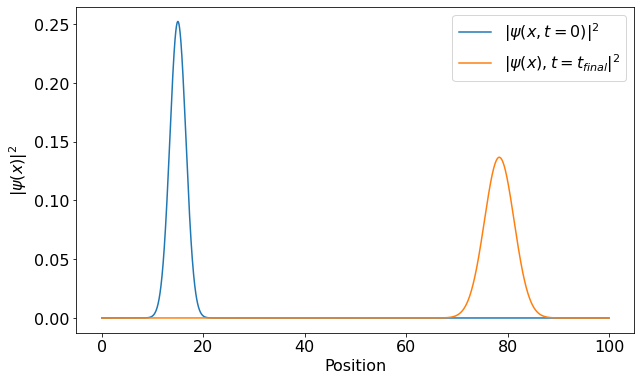

In [11]:
def task3():    
    psi3 = create_normalized_wavefunction(xs, v) # creates a normalized wavefunction
    lam, phi = calc_eigens(0, 500) # calculates eigenvalues and eigenfunctions
    a = calc_a(phi, psi3) # calculates a
    psi3_final = sum_spectral(a, lam, phi, t_final = 4) # propagates psi3 forward to t = 4
    plt.plot(xs, np.abs(psi3)**2, label = '$|\psi(x, t = 0)|^2$') # plots initial wavefunction
    plt.plot(xs, np.abs(psi3_final)**2, label = '$|\psi(x), t = t_{final}|^2$') # plots wavefunction at t_final
    plt.ylabel('$|\psi(x)|^2$')
    plt.xlabel('Position')
    plt.legend()
    pos = integrate.simps(xs*np.abs(psi3_final)**2, xs) # numerical integration to obtain mean position
    print(pos)
    
task3()

# Task 4 (10p)

Now repeat task 3 for a potential made up of regularly spaced wells such that

V=70 for |x-i| < 0.25 where i=0,1,...,100,

and V=0 elsewhere.

Plot the potential. It should be $V=70$ for $x=0...0.25$, $V=0$ for $x=0.25...0.75$, $V=70$ for $x=0.75...1.25$, and so on.

Determine the mean of $|\psi(x,t)|^2$ as before, with accuracy $\pm$1.

Make sure that dx and dt are sufficiently small to achieve this accuracy!

In the cell below, create the potential and plot it over the range [0, 3].

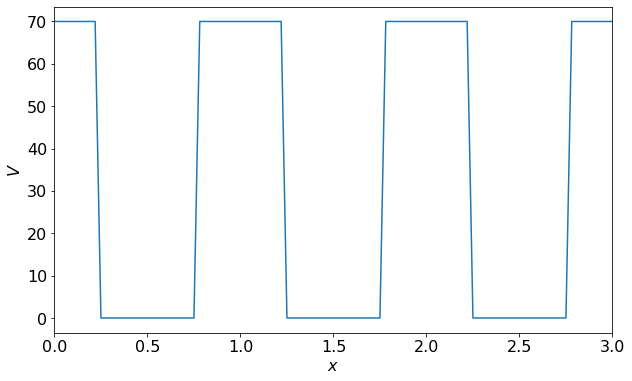

In [12]:
def task4_part1():
    V4 = np.zeros(N)
    for i in range(0, 101):
        V4[np.abs(xs - i) < 0.25] = 70
        
    plt.plot(xs, V4)
    plt.xlim(0, 3)
    plt.xlabel('$x$')
    plt.ylabel('$V$')
    return V4
    
V4 = task4_part1()


# Task 4 continued

In the cell below, repeat task 3 with the new potential.

56.4078493396956


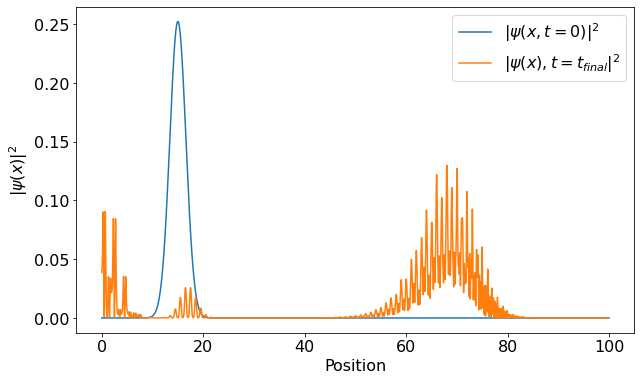

In [13]:
def task4_part2():
    psi4 = create_normalized_wavefunction(xs, v) # creates normalized wavefunctions
    lam, phi = calc_eigens(V4, 1000) # calculates eigenvalues and eigenfunctions
    a = calc_a(phi, psi4) # calculates a
    psi4_final = sum_spectral(a, lam, phi, t_final = 4) # propagates psi4 forward in time
    plt.plot(xs, np.abs(psi4)**2, label = '$|\psi(x, t = 0)|^2$') # plots initial wavefunction
    plt.plot(xs, np.abs(psi4_final)**2, label = '$|\psi(x), t = t_{final}|^2$') # plots wavefunction at t_final
    plt.ylabel('$|\psi(x)|^2$')
    plt.xlabel('Position')
    plt.legend()
    pos = integrate.simps(xs*np.abs(psi4_final)**2, xs) # numerical integration to obtain mean position
    print(pos)

task4_part2()

# Task 5 (15p)

Calculate the probability $P_{1/2}$ of the particle moving through the point x=L/2 by integrating the probability current 

$
\large
\begin{align}
j = (\psi^*  \frac{\partial \psi}{\partial x} -
\psi \frac{\partial \psi^*}{\partial x})(x=L/2)
\end{align}
$

over time, for t=0...4. The probability can deviate from the true value by no more than $\pm$0.01 (hint: the correct value is between 0.5 and 1).

In the cell below, calculate the probability and print your answer.

In [14]:
dt = 1/64 # uses more precise dt here
ts = np.arange(dt, 4+dt, dt)

def task5():
    psi5 = create_normalized_wavefunction(xs, v) # creates normalized wavefunction
    lam, phi = calc_eigens(V4, 1000) # calculates eigenfunctions and eigenvalues
    a = calc_a(phi, psi5) # calculates a
    """
    The previous remain constant no matter the t, which is why they are not in the loop
    """
    
    js = []
    for t in ts: # goes through ts
        psi_temp = sum_spectral_reduced(a, lam, phi, t) # evolves for each t
        J_temp = J_12(psi_temp) # calculates j for each evolved wavefunction
        js.append(J_temp) # adds j_temp to the list
    
    p12 = integrate.simps(js, ts) # numerical integration of the probability current
    print(p12)
    
task5()

0.8160362700863832


# Task 6 (15p)

Plot the probability $P_{1/2}$ as a function of particle energy E=0...100, for at least 100 equally-spaced values from this range. All $P_{1/2}$ values should be within $\pm$0.01 of the true values. Use the formula 

$
\large
\begin{align}
E = \frac{1}{4} v^2
\end{align}
$

to convert between energy and velocity (valid for Eqs. (1,2)).

Bonus question: can you explain why the plot looks like this?

Plot the probability in the cell below.

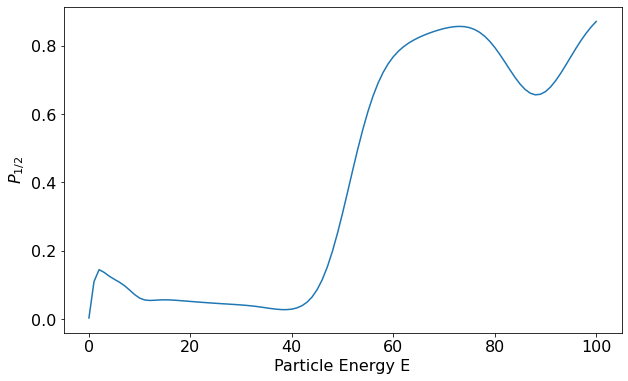

In [17]:
dt = 1/64 # less precise dts for speed here
ts = np.arange(dt, 4+dt, dt)

def task6():
    Es = np.arange(0, 101, 1) # creates Es
    vs = 2 * np.sqrt(Es) # calculate vs
    
    ps = []
    
    lam, phi = calc_eigens(V4, 1000) # eigenfunctions and eigenvalues, only need to be calculated once
    for v in vs: # run for each v
        psi = create_normalized_wavefunction(xs, v) #
        a = calc_a(phi, psi)
        js = []
        for t in ts:
            psi_temp = sum_spectral_reduced(a, lam, phi, t)
            J_temp = J_12(psi_temp)
            js.append(J_temp)
    
        p12_temp = integrate.simps(js, ts)
        ps.append(p12_temp)
    plt.plot(Es, ps)
    plt.xlabel("Particle Energy E")
    plt.ylabel("$P_{1/2}$")
    
task6()

The initial peak would be the values for which $\Psi$ would just spread out evenly. Afterwards, the probability increases with speed intuitively. My guess is that the dip happens because the higher energy wavefunctions bounce off one of the well walls and don't reflect back over. Afterwards, it increases because they have enough energy to bounce again once more past $L/2$.

# Task 7 (10p)

Assume again the initial condition of equation (2) with v=16, and consider a disordered potential in which

V=70 for |x-i| < b$_i$ where i=0,1,...,100,

and b$_i$ is a random variable uniformly distributed on [0.125, 0.375].

Find the probability $P_{1/2}$ by averaging over 100 realizations of the random potential (must be accurate to $\pm$0.02). Plot the histogram of $P_{1/2}$. Comment on the value of $P_{1/2}$ compared with task 5.

0.045879369613301454


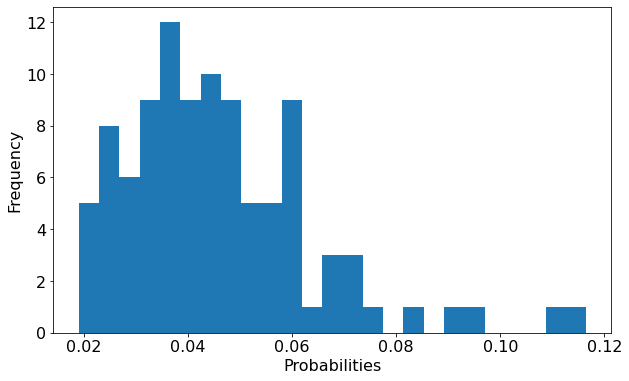

In [16]:
def task7():
    v = 16 # original v
    psi7 = create_normalized_wavefunction(xs, v) # create a normalized wavefunction
    
    ps = []
    for i in range(100):
        V7 = random_potential() # creates a random potential
        lam, phi = calc_eigens(V7, 500) # calculates eigenvalues. Only 500 for speed
        a = calc_a(phi, psi7) # calculate a
        js = [] #
        for t in ts:
            psi_temp = sum_spectral_reduced(a, lam, phi, t) #  propagates middle 3 elements of wavefunction to time t
            J_temp = J_12(psi_temp) # calculates j
            js.append(J_temp)
    
        p12_temp = integrate.simps(js, ts) # integrates j to find the probability
        ps.append(p12_temp)
        
    ps = np.array(ps) 
    ps_mean = np.mean(ps) # computes mean probability
        
    hist, bins, p = plt.hist(ps, bins=25) # plots histogram
    plt.xlabel("Probabilities")
    plt.ylabel("Frequency")
    print(ps_mean)
    
task7()

The value of $P_1/2$ is much lower than for task 5. This would show that even though the mean separation for the potentials is the same, the presence of outliers, such as a series of wells that are closer together than in the regular potential, reduces the ability of the wavefunction to propagate to the right.